In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de datos y control de Calidad

In [3]:
datos = pd.read_excel("bank-full.xlsx")
datos

,ID client,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [21]:
def verificar_datos_faltantes(df):
    datos_faltantes = df.isnull().sum()
    columnas_con_faltantes = datos_faltantes[datos_faltantes > 0]
    
    if not columnas_con_faltantes.empty:
        for col, faltantes in columnas_con_faltantes.items():
            print(f"Datos faltantes en '{col}': {faltantes}")
    else:
        print("No hay datos faltantes en ninguna columna.")

verificar_datos_faltantes(datos)

No hay datos faltantes en ninguna columna.


In [28]:
def identificar_outliers(df):
    # Seleccionar solo columnas numéricas (excluyendo 'ID')
    columnas_numericas = df.select_dtypes(include=['number']).columns.difference(['ID client'])

    for col in columnas_numericas:
        # Calcular el rango intercuartílico (IQR)
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1

        # Definir límites para identificar outliers
        lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Identificar y contar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        cantidad_outliers = outliers.shape[0]

        print(f"Columna '{col}' tiene {cantidad_outliers} outliers." if cantidad_outliers > 0 else f"No hay outliers en la columna '{col}'.")

# Identificar outliers en columnas numéricas
identificar_outliers(datos)


Columna 'age' tiene 487 outliers.
Columna 'balance' tiene 4729 outliers.
Columna 'campaign' tiene 3064 outliers.
No hay outliers en la columna 'day'.
Columna 'duration' tiene 3235 outliers.
Columna 'pdays' tiene 8257 outliers.
Columna 'previous' tiene 8257 outliers.


## Analisis descriptivo de los datos

In [53]:
# Columnas numéricas
columnas_numericas = ['age', 'balance', 'campaign', 'duration']

# Excluir columnas
columnas_a_ignorar = ['ID client', 'day', 'month', 'pdays', 'previous']
columnas_categoricas = datos.columns.difference(columnas_numericas + columnas_a_ignorar)

# Análisis descriptivo para columnas numéricas
desc_numerico = datos[columnas_numericas].describe()

# Análisis descriptivo para columnas categóricas
desc_categorico = datos[columnas_categoricas].describe(include='all')

# Mostrar resultados
print("Análisis Descriptivo para Columnas Numéricas:")
print(desc_numerico.round(2).to_string())

print("\nAnálisis Descriptivo para Columnas Categóricas:")
print(desc_categorico.to_string())

desc_categorico.to_excel("desc_categorico.xlsx")
desc_numerico.to_excel("desc_numerico.xlsx")

Análisis Descriptivo para Columnas Numéricas:
            age    balance  campaign  duration
count  45211.00   45211.00  45211.00  45211.00
mean      40.94    1362.27      2.76    258.16
std       10.62    3044.77      3.10    257.53
min       18.00   -8019.00      1.00      0.00
25%       33.00      72.00      1.00    103.00
50%       39.00     448.00      2.00    180.00
75%       48.00    1428.00      3.00    319.00
max       95.00  102127.00     63.00   4918.00

Análisis Descriptivo para Columnas Categóricas:
       Target   contact default  education housing          job   loan  marital poutcome
count   45211     45211   45211      45211   45211        45211  45211    45211    45211
unique      2         3       2          4       2           12      2        3        4
top        no  cellular      no  secondary     yes  blue-collar     no  married  unknown
freq    39922     29285   44396      23202   25130         9732  37967    27214    36959


## KPI's y Métricas

In [61]:
exitos = datos[datos['Target'] == 'yes'].shape[0]
total = datos.shape[0]
tasa_exito = (exitos / total) * 100
print(f"La tasa de éxito de la campaña es del {tasa_exito}%")
print(exitos)

La tasa de éxito de la campaña es del 11.698480458295547%
5289


In [56]:
promedio_duracion = datos['duration'].mean()
print(f"La duración promedio del último contacto es de {promedio_duracion} segundos")

La duración promedio del último contacto es de 258.1630797814691 segundos


In [57]:
en_mora = datos[datos['default'] == 'yes'].shape[0]
proporcion_mora = (en_mora / total) * 100
print(f"El {proporcion_mora}% de los clientes tienen crédito en mora")

El 1.8026586450200173% de los clientes tienen crédito en mora


In [58]:
con_prestamo = datos[datos['loan'] == 'yes'].shape[0]
proporcion_prestamo = (con_prestamo / total) * 100
print(f"El {proporcion_prestamo}% de los clientes tienen un préstamo personal")

El 16.022649355245406% de los clientes tienen un préstamo personal


In [59]:
con_hipoteca = datos[datos['housing'] == 'yes'].shape[0]
proporcion_hipoteca = (con_hipoteca / total) * 100
print(f"El {proporcion_hipoteca}% de los clientes tienen un préstamo hipotecario")

El 55.583818097365686% de los clientes tienen un préstamo hipotecario


In [65]:
exitosas = datos[datos['Target'] == 'yes']
promedio_duracion_exitosas = exitosas['duration'].mean()/60
print(f"El promedio de la duración de las llamadas exitosas es de {promedio_duracion_exitosas} minutos")

El promedio de la duración de las llamadas exitosas es de 8.954909560723515 minutos


In [60]:
promedio_contactos = datos[datos['campaign']].mean()
print(f"El número promedio de contactos realizados durante la campaña es de {promedio_contactos}")

El número promedio de contactos realizados durante la campaña es de 2.763840658246887


In [66]:
jubilados = datos[datos['job'] == 'retired'].shape[0]
proporcion_jubilados = (jubilados / total) * 100
print(f"El {proporcion_jubilados}% de los clientes están jubilados")

El 5.0076308862887355% de los clientes están jubilados


In [70]:
jovenes = datos[datos['age'] < 30].shape[0]
proporcion_jovenes = (jovenes / total) * 100
print(f"El {proporcion_jovenes}% de los clientes son 'jóvenes'")

El 11.663090840724601% de los clientes son 'jóvenes'


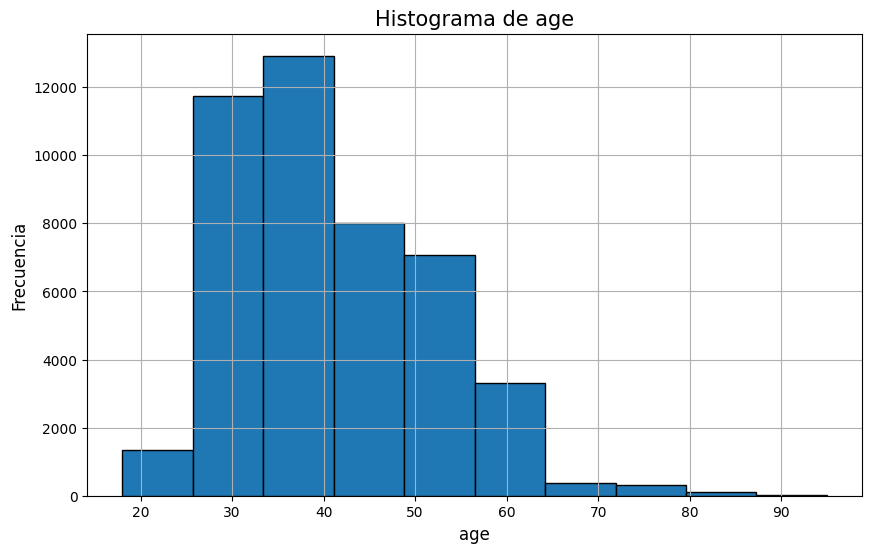

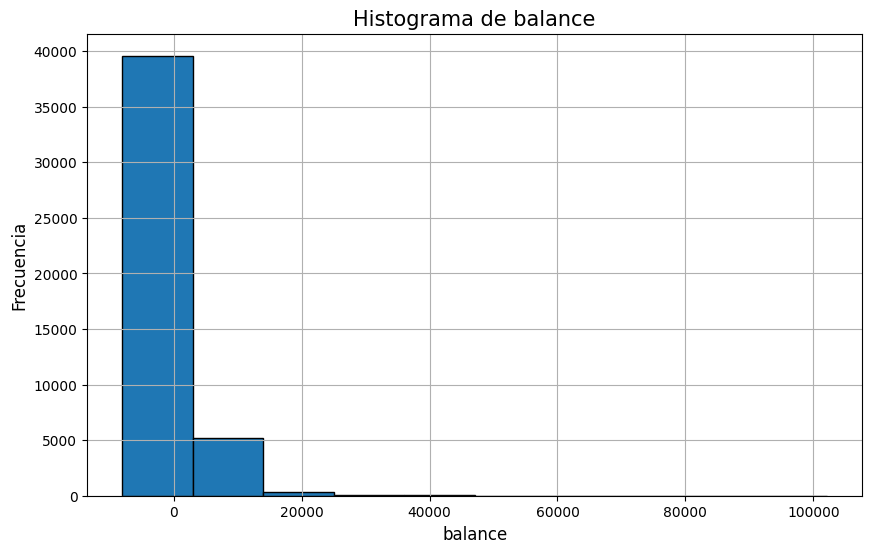

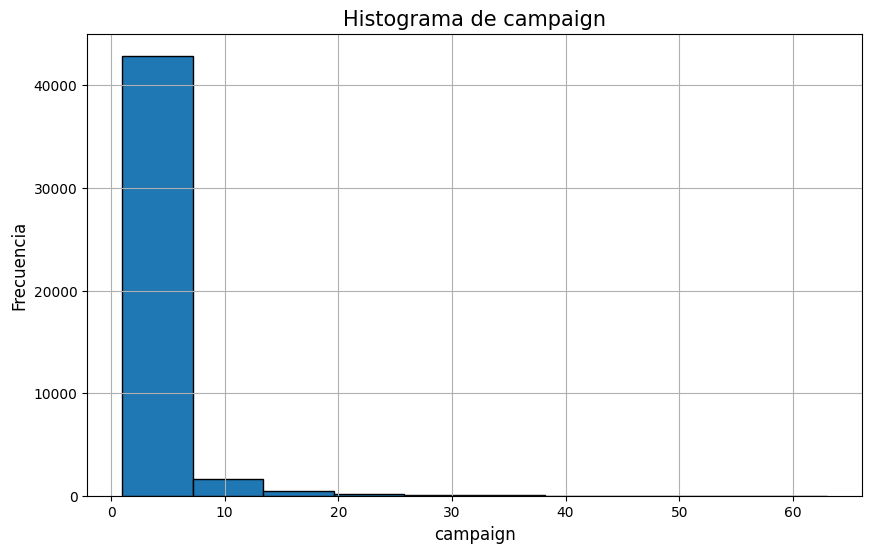

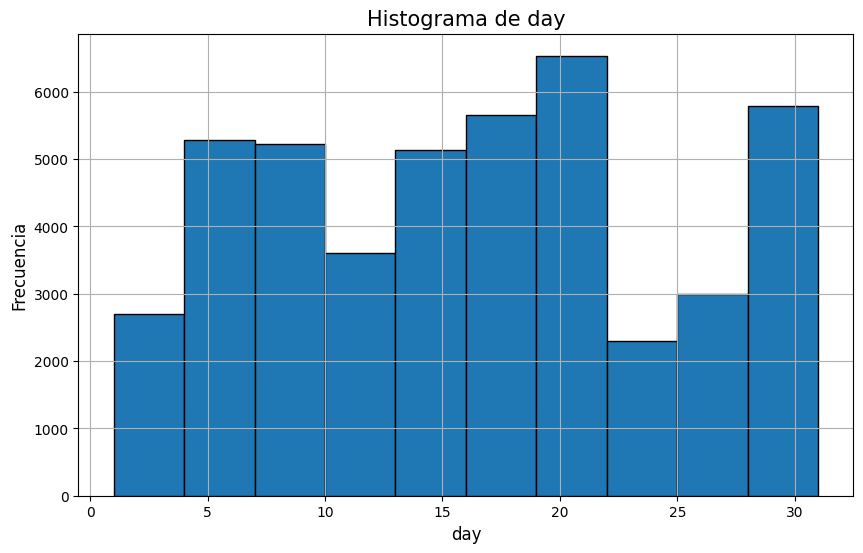

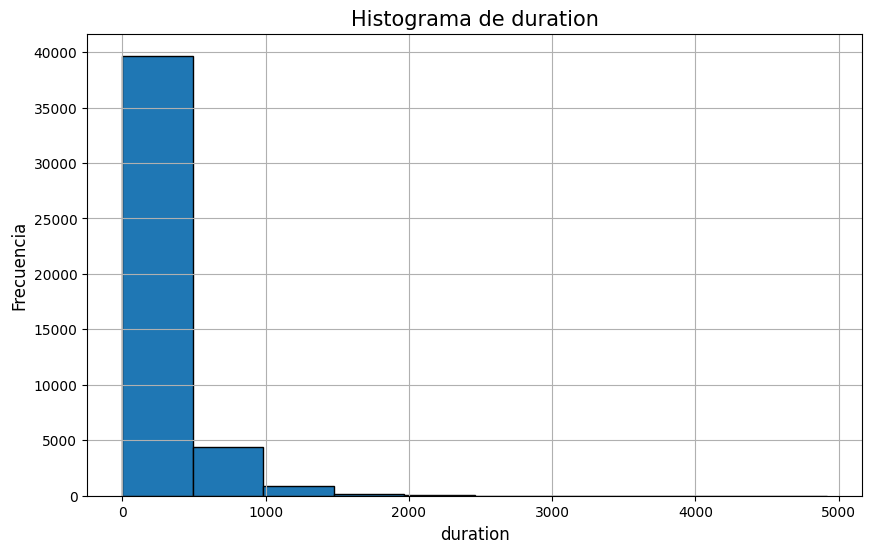

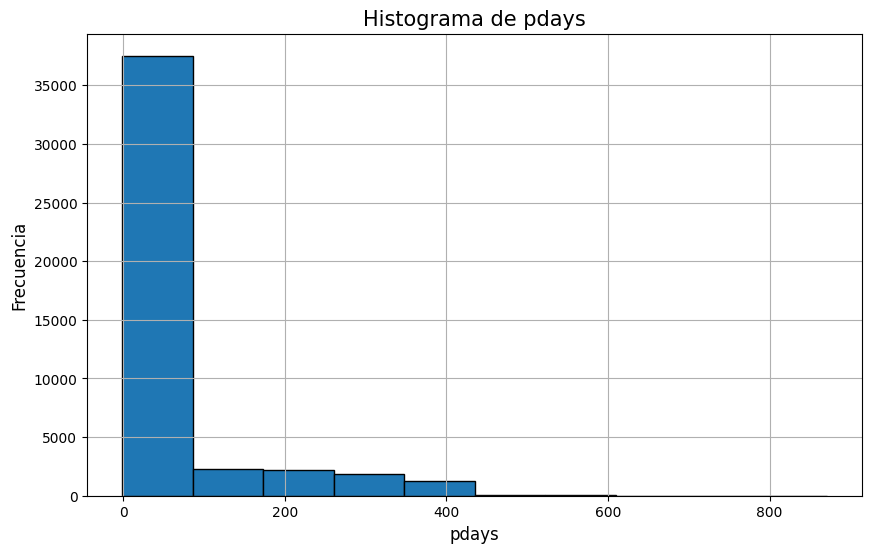

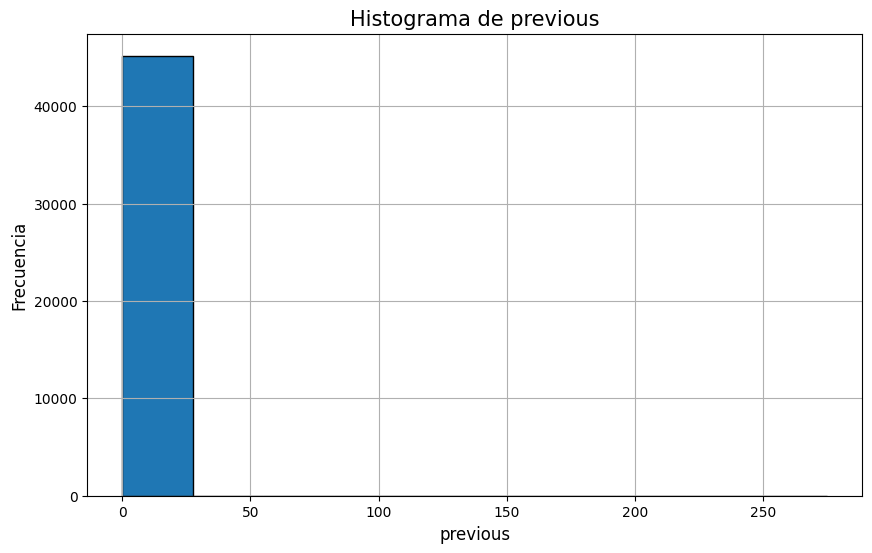

In [32]:
# Lista de todas las columnas numéricas, excluyendo 'ID client'
columnas_numericas = datos.select_dtypes(include=['number']).columns.difference(['ID client'])

# Creamos un histograma para cada columna numérica
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))  # Crea una nueva figura con un tamaño personalizado
    plt.hist(datos[columna], bins=10, edgecolor='black')  # Usa los datos de la columna, con 30 bins y bordes negros para los bins
    plt.title(f'Histograma de {columna}', fontsize=15)  # Añade un título a la figura con el nombre de la columna
    plt.xlabel(columna, fontsize=12)  # Añade una etiqueta al eje x
    plt.ylabel('Frecuencia', fontsize=12)  # Añade una etiqueta al eje y
    plt.grid(True)  # Añade una cuadrícula para mejorar la legibilidad
    plt.show()  # Muestra el gráfico